/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_58730/3098315297.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


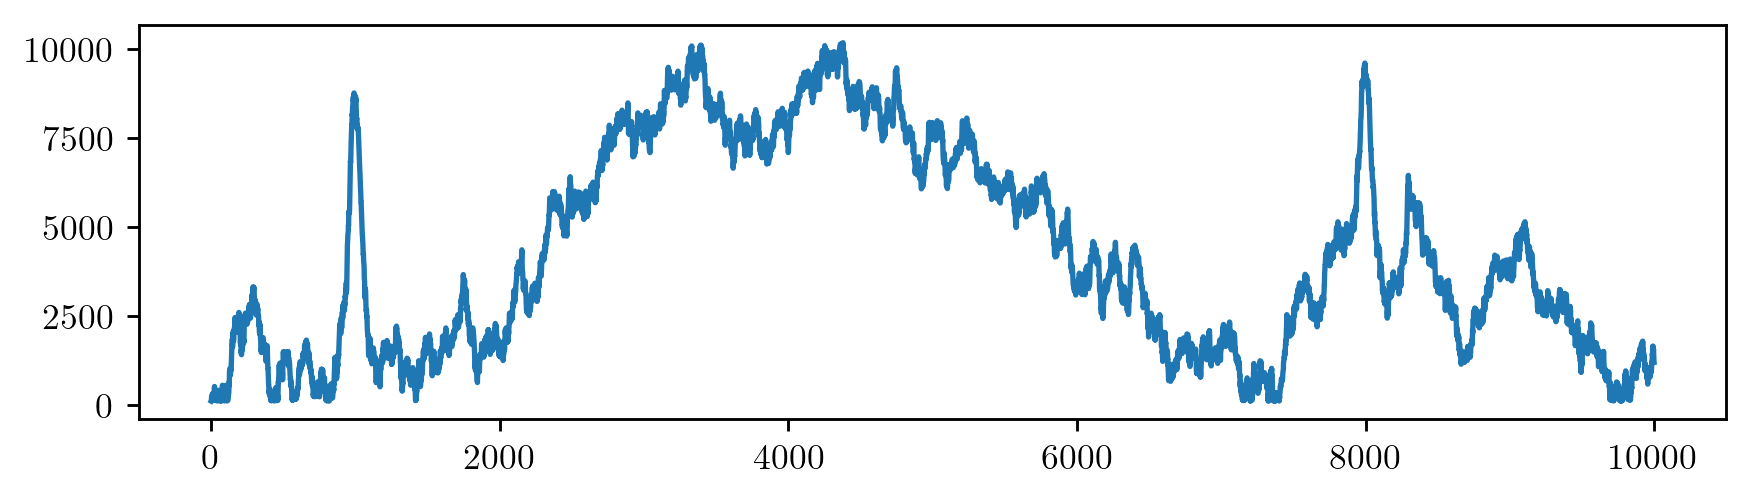

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import importlib
import pandas as pd
import vecenvs

from stable_baselines3 import A2C, PPO
from matplotlib import cm

importlib.reload(vecenvs)

plt.rcParams['figure.dpi'] = 256
plt.rcParams['text.usetex'] = True
plt.rcParams['animation.ffmpeg_path'] = '/Applications/ffmpeg'

np.random.seed(0)

setup_name = 'test'

node_df = pd.read_csv(f'supplychains/{setup_name}/nodes.csv')
edge_df = pd.read_csv(f'supplychains/{setup_name}/edges.csv')

max_time = 10000

supply_nodes = np.array([7, 8])
supply_amounts = 100 * np.random.poisson(10, size=(2, max_time))
supply_prices = 1 * np.ones(shape=(2, max_time))

demand_nodes = np.array([0])
demand_prices = 30.0 * np.ones(shape=(1, max_time))

demand_means = 100 * np.sin(np.pi * np.arange(max_time)/ 1000)**2 + 100
demand_means = np.zeros(max_time)
demand_means[0] = 0

for t in range(max_time-1):
    demand_means[t+1] = demand_means[t] + np.random.normal(0, 100)

def normal_spike(x, mu, sigsq):
    return np.exp(-(x-mu)**2 / sigsq)

demand_means = np.abs(demand_means) + 100
demand_means += 8000 * normal_spike(np.arange(max_time), 1000, 4000)
demand_means += 6000 * normal_spike(np.arange(max_time), 8000, 4000)
demand_amounts = demand_means.reshape(1, -1)

supplies = (supply_nodes, supply_amounts, supply_prices)
demands = (demand_nodes, demand_amounts, demand_prices)

fig, ax = plt.subplots()
fig.set_size_inches(8, 2)

ax.plot(demand_means)

fig.show()
    

In [147]:
num_envs = 1

env = vecenvs.VectorisedSupplyChain(node_df, edge_df, supplies, demands, max_time, num_envs, update_interval=100)
model = PPO('MlpPolicy', env, verbose=0, n_steps=10, learning_rate=1e-4)
num_episodes = 1

rewards = np.zeros(shape=(num_episodes, num_envs, env.max_time, env.num_nodes))

for episode in range(num_episodes):
    env.reset()
    model.learn(total_timesteps=max_time*num_envs)
    rewards[episode] = env.batch_node_profit_history
    print(f'Done episode {episode+1}/{num_episodes}')

/Users/max/Library/Python/3.9/lib/python/site-packages/stable_baselines3/ppo/ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 10`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 10
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=10 and n_envs=1)
  warnings.warn(
/Users/max/Documents/PeakAI/rl4sc/vecenvs.py:201: RuntimeWarning: invalid value encountered in double_scalars
  mean_tot_reward = np.sum(self.batch_node_profit_history) / (self.num_envs * self.time)


100: -1800.00
200: -451.40
300: 50613.23
400: 77194.89
500: -4271.77
600: 35870.38
700: -7710.54
800: -4349.48
900: -12053.27
1000: -16706.71
1100: 251776.30
1200: -4897.95
1300: 23634.47
1400: 36842.42
1500: 4825.23
1600: 16235.24
1700: 36947.33
1800: 49561.12
1900: 39977.34
2000: -15697.16
2100: 33385.67
2200: -10383.74
2300: -8704.82
2400: -11298.13
2500: -14425.11
2600: -13080.20
2700: -8410.95
2800: 82677.15
2900: -10155.95
3000: 183559.15
3100: 58603.50
3200: 215408.40
3300: -6518.00
3400: -6713.20
3500: 227920.70
3600: 244992.03
3700: 115540.70
3800: 136573.10
3900: -7812.00
4000: -6742.48
4100: -8651.82
4200: -9264.00
4300: 18647.30
4400: 205263.80
4500: -9338.30
4600: -7566.36
4700: 96610.02
4800: -5891.97
4900: 63382.50
5000: -6928.80
5100: -3922.10
5200: -7750.80
5300: 87728.90
5400: 198774.14
5500: 175237.68
5600: 98243.44
5700: -14968.45
5800: -9022.93
5900: 75955.69
6000: 526.97
6100: 88976.96
6200: -13339.33
6300: -17594.23
6400: -10525.00
6500: -18188.23
6600: 49779.78


/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_58730/3178817733.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


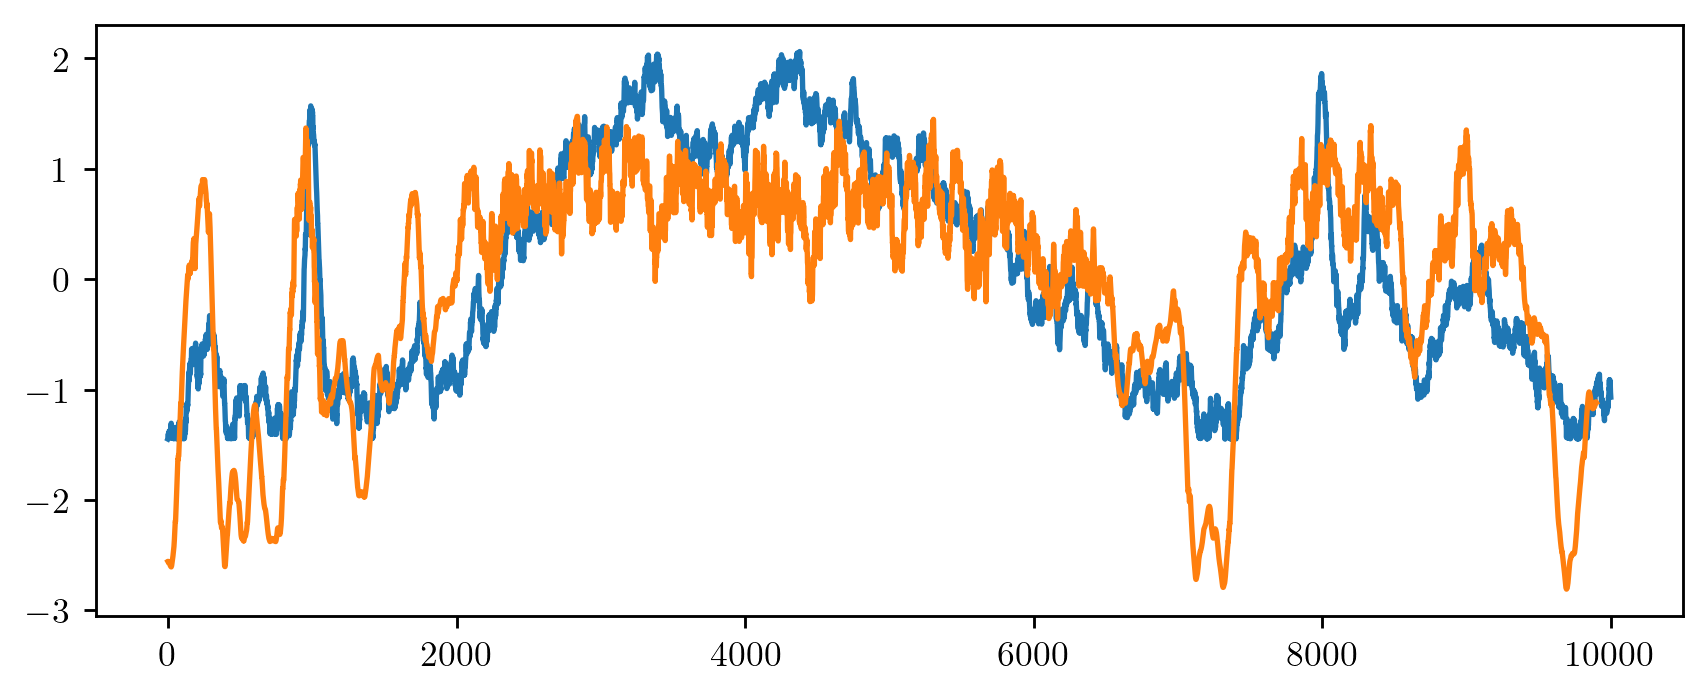

In [148]:



fig, ax = plt.subplots()
fig.set_size_inches(8, 3)

N = 100

x = demand_amounts[0]

ax.plot((x-np.mean(x))/np.std(x))

x = np.sum(rewards[0], axis=-1)
x = np.mean(x, axis=0)
x = np.convolve(x, np.ones(N)/N, mode='valid')

ax.plot((x-np.mean(x))/np.std(x))

fig.show()

/Users/max/Documents/PeakAI/rl4sc/vecenvs.py:278: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


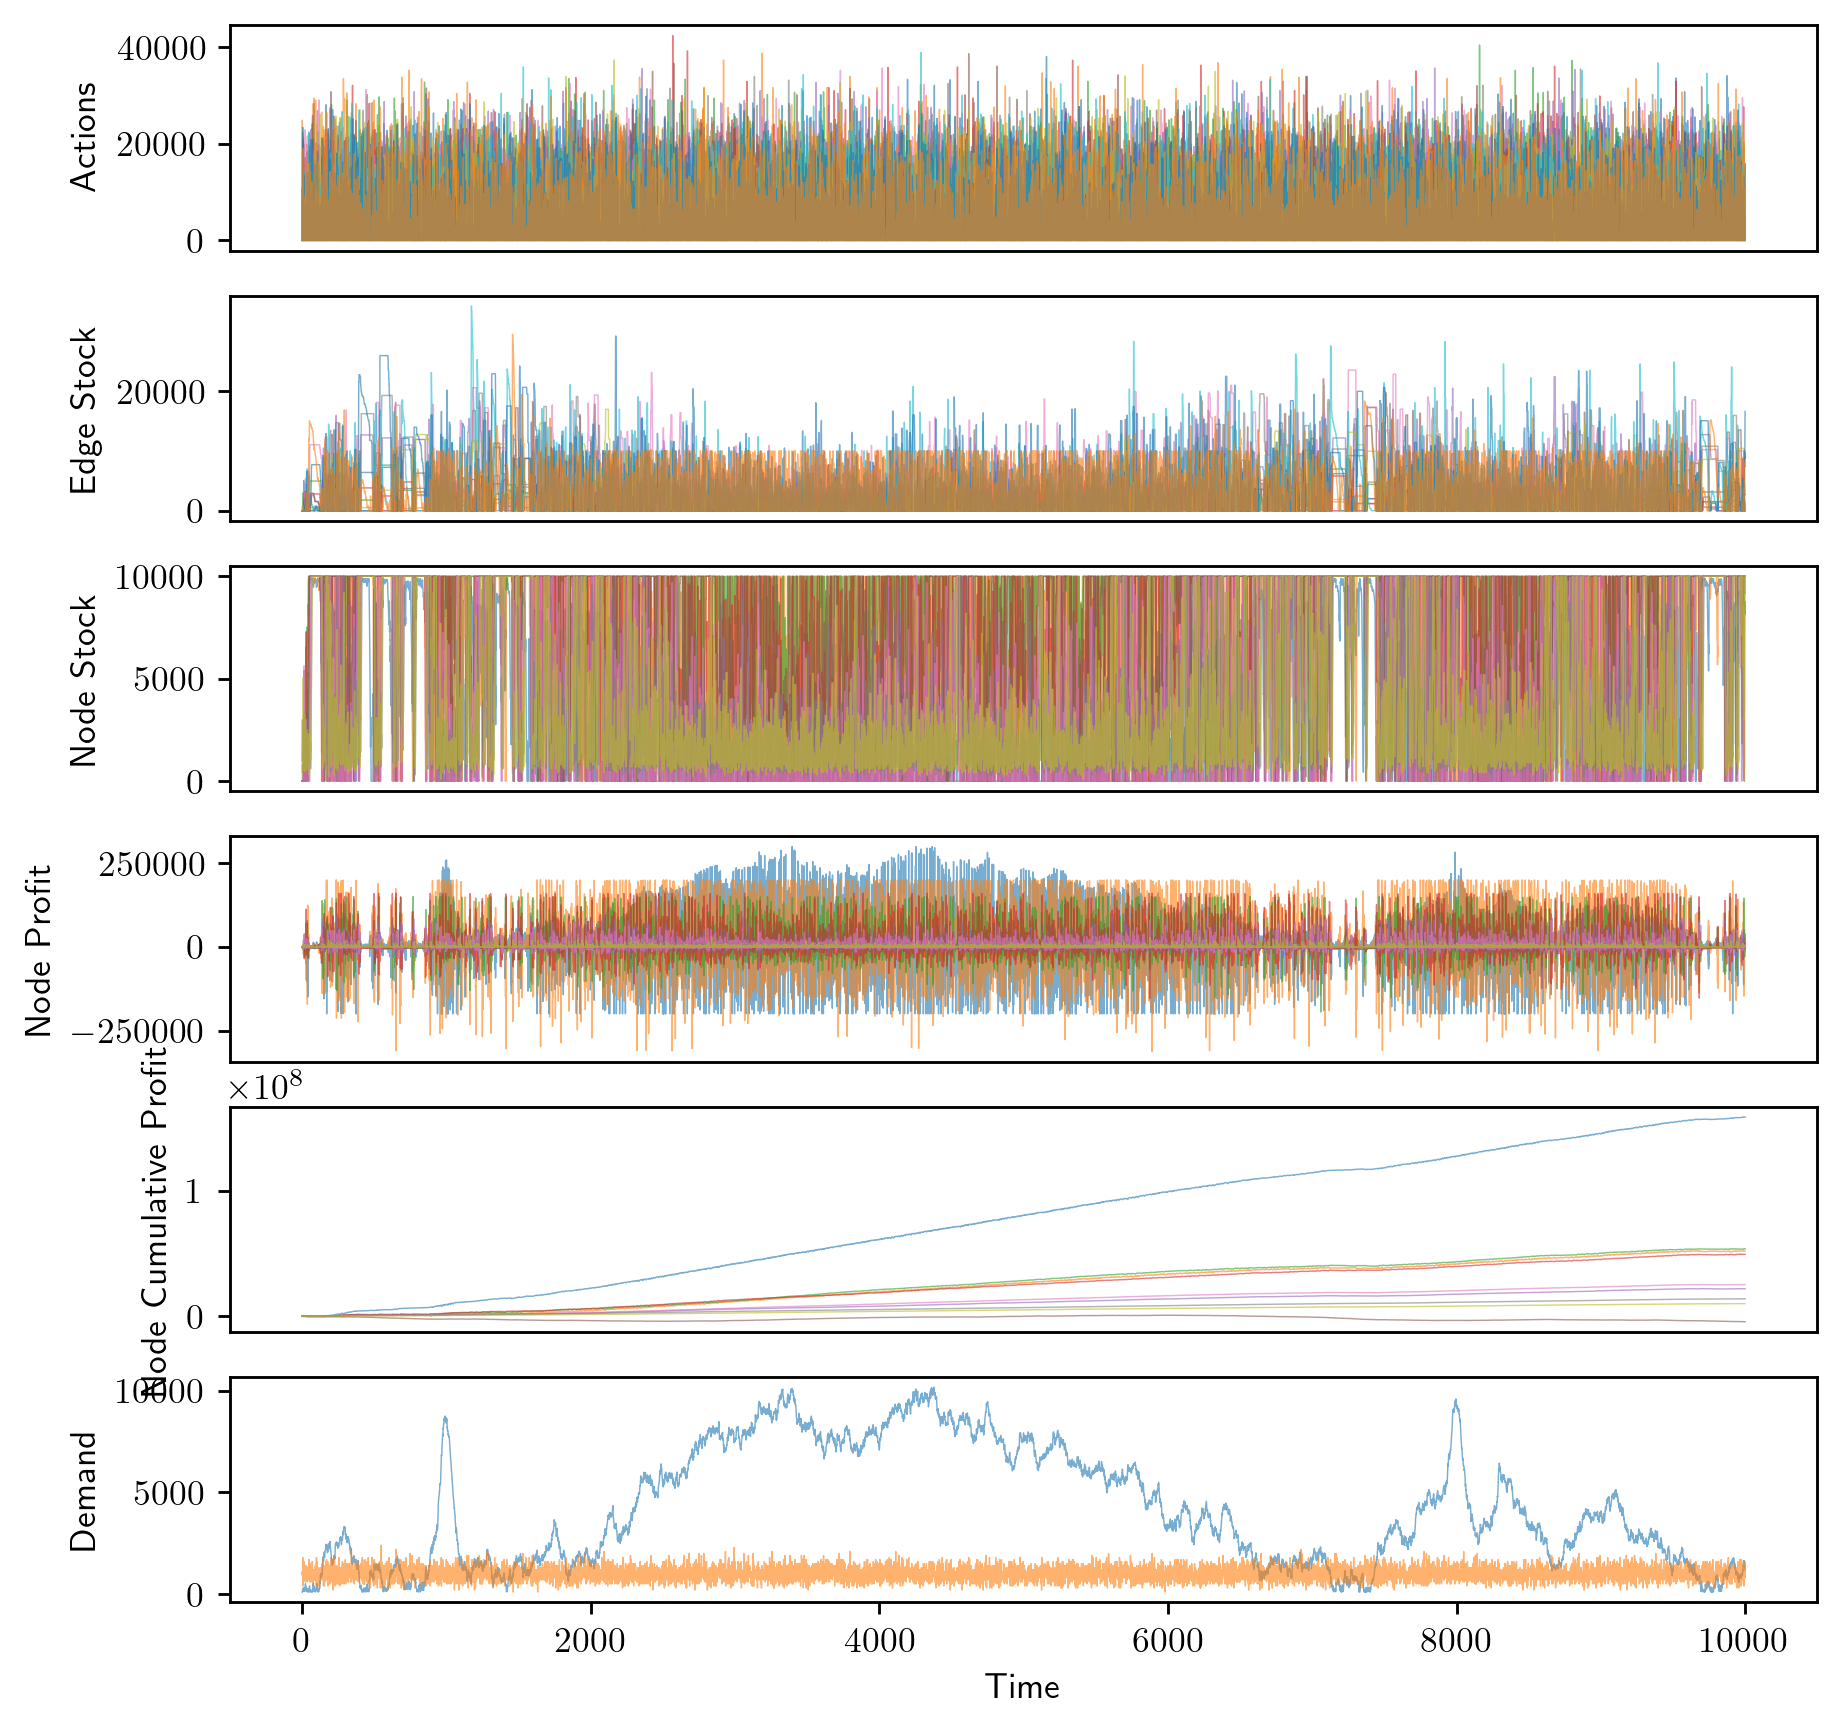

In [149]:
env.plot_history()

/Users/max/Documents/PeakAI/rl4sc/vecenvs.py:371: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


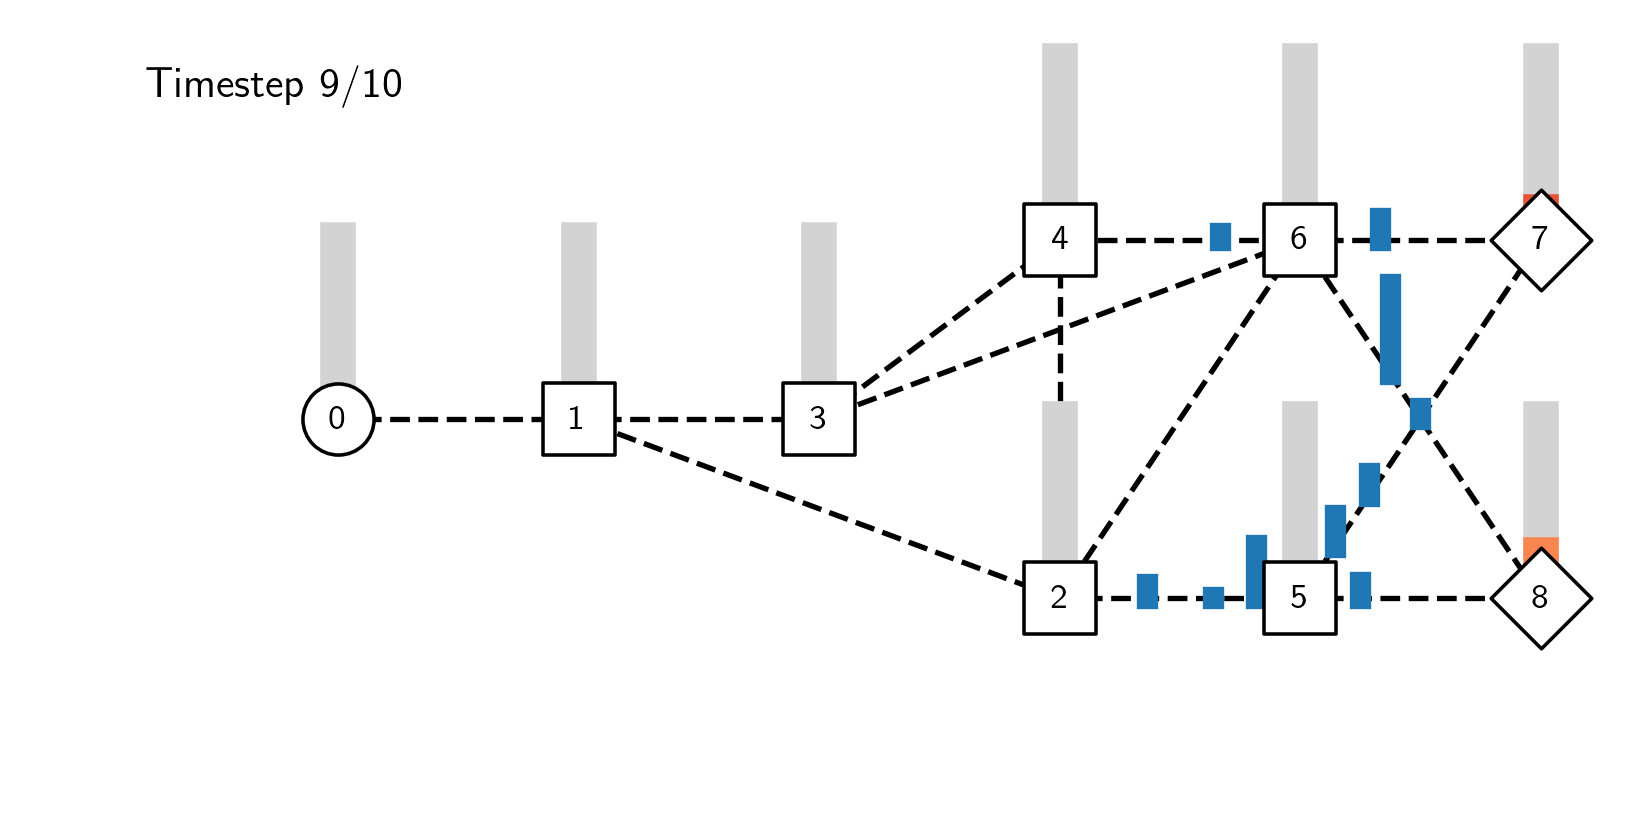

In [150]:
env.animate_history(0, 10, 'supplychains/test/0_500_vec.gif')